# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [91]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

import warnings
warnings.filterwarnings('ignore')

In [92]:
import hvplot.pandas

In [93]:
# Read the Mapbox API key
load_dotenv("jfk.env")
MAPBOX_API_KEY = os.getenv("MAPBOX_API_KEY")

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [6]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_grp = sfo_data.groupby('year').sum()
sfo_data_grp.head()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,21791.316846,21981040,73101
2011,20172.302322,22095913,90270
2012,23164.618170,21834332,134792
2013,27081.617039,21568857,169347
2014,33376.636407,22820880,211680


In [7]:
sfo_data_grp.tail()

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2012,23164.618170,21834332,134792
2013,27081.617039,21568857,169347
2014,33376.636407,22820880,211680
2015,34789.719362,22173110,216862
2016,31393.966910,17675132,201940


In [8]:
sfo_data_grp.max()

sale_price_sqr_foot    3.478972e+04
housing_units          2.282088e+07
gross_rent             2.168620e+05
dtype: float64

In [9]:
sfo_data_grp.min()

sale_price_sqr_foot    2.017230e+04
housing_units          1.767513e+07
gross_rent             7.310100e+04
dtype: float64

In [10]:
# Save the dataframe as a csv file
sfo_data_grp.to_csv("sfo_data_grp.csv", index=False)

In [11]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data_grp.hvplot.bar(x='year', y='housing_units',
        title="Housing Units in San Francisco 2010 - 2016",  xlabel="Year", ylabel="Housing Units"). opts(yformatter="%.0f", ylim=(12000000,24000000))

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [12]:
# Calculate the average sale price per square foot and average gross rent
sfo_data_avg = sfo_data.groupby('year').mean()
sfo_data_avg

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [13]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sfo_data_avg.hvplot(x='year', y='sale_price_sqr_foot',
        title="Average Price per SqFt by Year", xlabel="Year", ylabel="Sale Price per Sqr Foot"). opts(yformatter="%.0f")

:Curve   [year]   (sale_price_sqr_foot)

In [14]:
# Line chart for average montly rent
sfo_data_avg.hvplot(x='year', y='gross_rent',
        title="Average Monthly Rent by Year", xlabel="Year", ylabel="Gross Rent per Sqr Foot"). opts(yformatter="%.0f")

:Curve   [year]   (gross_rent)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [15]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_grp_hood_df= sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_data_grp_hood_df

sale_price_sqr_foot  housing_units  \
year neighborhood                                                        
2010 Alamo Square                            291.182945         372560   
     Anza Vista                              267.932583         372560   
     Bayview                                 170.098665         372560   
     Buena Vista Park                        347.394919         372560   
     Central Richmond                        319.027623         372560   
     Central Sunset                          418.172493         372560   
     Corona Heights                          369.359338         372560   
     Cow Hollow                              569.379968         372560   
     Croker Amazon                           165.645730         372560   
     Diamond Heights                         456.930822         372560   
     Downtown                                241.804552         372560   
     Eureka Valley/Dolores Heights           403.118313         372560   
     Excelsior                               364.928336         372560   
     Financial District North                401.749967         372560   
     Financial District South                162.821210         372560   
     Forest Knolls                           209.049327         372560   
     Glen Park                               715.586438         372560   
     Golden Gate Heights                     551.801119         372560   
     Haight Ashbury                          254.473779         372560   
     Hayes Valley                            272.284980         372560   
     Hunters Point                           170.624920         372560   
     Ingleside                               275.056686         372560   
     Inner Mission                           238.350020         372560   
     Inner Parkside                          199.702004         372560   
     Inner Richmond                          285.822358         372560   
     Inner Sunset                            275.769730         372560   
     Jordan Park/Laurel Heights              419.887812         372560   
     Lake --The Presidio                     320.796910         372560   
     Lone Mountain                           398.458876         372560   
     Lower Pacific Heights                   374.057636         372560   
...                                                 ...            ...   
2016 Inner Mission                           647.770447         384242   
     Inner Parkside                          518.112650         384242   
     Inner Richmond                          403.311132         384242   
     Inner Sunset                            445.923828         384242   
     Jordan Park/Laurel Heights              704.566419         384242   
     Lower Pacific Heights                   636.430770         384242   
     Marina                                  431.944602         384242   
     Merced Heights                         1416.666667         384242   
     Mission Bay                             924.569116         384242   
     Mission Terrace                         879.017013         384242   
     Nob Hill                                777.008315         384242   
     Noe Valley                              799.495651         384242   
     North Beach                             407.553322         384242   
     Outer Mission                            40.772625         384242   
     Outer Parkside                          732.720684         384242   
     Outer Richmond                         1196.645437         384242   
     Outer Sunset                            510.576907         384242   
     Pacific Heights                         996.389364         384242   
     Park North                              211.301370         384242   
     Parnassus/Ashbury Heights              1207.997485         384242   
     Potrero Hill                            707.651609         384242   
     Presidio Heights                   

In [105]:
sfo_data_grp_hood_avg_df= sfo_data.groupby(['neighborhood']).mean()
sfo_data_grp_hood_avg_df

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
Buena Vista Park,2012.833333,452.680591,378076.50,2698.833333
Central Richmond,2013.000000,394.422399,378401.00,2817.285714
Central Sunset,2013.000000,423.687928,378401.00,2817.285714
Clarendon Heights,2012.000000,487.244886,376454.00,2250.500000


In [17]:
def choose_neighborhood(neighborhood):
    return neighborhood

list_of_neighborhoods = ['Alamo Square', 'Anza Vista', 'Bayview', 'Bayview Heights', 'Bernal Heights ', 'Buena Vista Park', 'Central Richmond', 'Central Sunset', 'Clarendon Heights', 'Corona Heights', 'Cow Hollow', 'Croker Amazon', 'Diamond Heights', 'Downtown ', 'Duboce Triangle', 'Eureka Valley/Dolores Heights', 'Excelsior', 'Financial District North', 'Financial District South', 'Forest Knolls', 'Glen Park', 'Golden Gate Heights', 'Haight Ashbury', 'Hayes Valley', 'Hunters Point', 'Ingleside ', 'Ingleside Heights', 'Inner Mission', 'Inner Parkside', 'Inner Richmond', 'Inner Sunset', 'Jordan Park/Laurel Heights', 'Lake --The Presidio', 'Lone Mountain', 'Lower Pacific Heights', 'Marina', 'Merced Heights', 'Midtown Terrace', 'Miraloma Park', 'Mission Bay', 'Mission Dolores', 'Mission Terrace', 'Nob Hill', 'Noe Valley', 'North Beach', 'North Waterfront', 'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond ', 'Outer Sunset', 'Pacific Heights', 'Park North', 'Parkside', 'Parnassus/Ashbury Heights', 'Portola', 'Potrero Hill', 'Presidio Heights', 'Russian Hill', 'Silver Terrace', 'South Beach', 'South of Market', 'Sunnyside', 'Telegraph Hill', 'Twin Peaks', 'Union Square District', 'Van Ness/ Civic Center', 'Visitacion Valley', 'West Portal', 'Western Addition', 'Westwood Highlands', 'Westwood Park', 'Yerba Buena']

interact(choose_neighborhood, neighborhood=list_of_neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Markdown(str, name='interactive02102')

In [18]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sfo_data_grp_hood_df.hvplot(x='year', y='sale_price_sqr_foot',
        title="Average Price per SqFt by Year", xlabel="Year", ylabel="Sale Price per Sqr Foot", groupby="neighborhood"). opts(yformatter="%.0f")


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [19]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_data_grp_hood_df.hvplot(x='year', y='gross_rent',
        title="Average Monthly Rent by Year", xlabel="Year", ylabel="Gross Rent per Sqr Foot", groupby="neighborhood"). opts(yformatter="%.0f")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [20]:
# Plotting the data from the top 10 expensive neighborhoods

sfo_data_grp_hood_avg_sort_df = sfo_data_grp_hood_avg_df.sort_values('sale_price_sqr_foot', ascending=False)
sfo_data_grp_hood_avg_sort_df.iloc[0:10] 
sfo_top_ten_hoods = sfo_data_grp_hood_avg_sort_df.iloc[0:10] 

sfo_top_ten_hoods.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot',
        title="The Top 10 Most Expensive Neighborhoods in SFO", xlabel="Neighborhood", ylabel="Sale Price per Sqr Foot", rot=45). opts(yformatter="%.0f")

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [206]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_data_grp_hood_df= sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_top_ten_hood = sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_top_ten_hood

sale_price_sqr_foot  housing_units  \
year neighborhood                                                        
2010 Alamo Square                            291.182945         372560   
     Anza Vista                              267.932583         372560   
     Bayview                                 170.098665         372560   
     Buena Vista Park                        347.394919         372560   
     Central Richmond                        319.027623         372560   
     Central Sunset                          418.172493         372560   
     Corona Heights                          369.359338         372560   
     Cow Hollow                              569.379968         372560   
     Croker Amazon                           165.645730         372560   
     Diamond Heights                         456.930822         372560   
     Downtown                                241.804552         372560   
     Eureka Valley/Dolores Heights           403.118313         372560   
     Excelsior                               364.928336         372560   
     Financial District North                401.749967         372560   
     Financial District South                162.821210         372560   
     Forest Knolls                           209.049327         372560   
     Glen Park                               715.586438         372560   
     Golden Gate Heights                     551.801119         372560   
     Haight Ashbury                          254.473779         372560   
     Hayes Valley                            272.284980         372560   
     Hunters Point                           170.624920         372560   
     Ingleside                               275.056686         372560   
     Inner Mission                           238.350020         372560   
     Inner Parkside                          199.702004         372560   
     Inner Richmond                          285.822358         372560   
     Inner Sunset                            275.769730         372560   
     Jordan Park/Laurel Heights              419.887812         372560   
     Lake --The Presidio                     320.796910         372560   
     Lone Mountain                           398.458876         372560   
     Lower Pacific Heights                   374.057636         372560   
...                                                 ...            ...   
2016 Inner Mission                           647.770447         384242   
     Inner Parkside                          518.112650         384242   
     Inner Richmond                          403.311132         384242   
     Inner Sunset                            445.923828         384242   
     Jordan Park/Laurel Heights              704.566419         384242   
     Lower Pacific Heights                   636.430770         384242   
     Marina                                  431.944602         384242   
     Merced Heights                         1416.666667         384242   
     Mission Bay                             924.569116         384242   
     Mission Terrace                         879.017013         384242   
     Nob Hill                                777.008315         384242   
     Noe Valley                              799.495651         384242   
     North Beach                             407.553322         384242   
     Outer Mission                            40.772625         384242   
     Outer Parkside                          732.720684         384242   
     Outer Richmond                         1196.645437         384242   
     Outer Sunset                            510.576907         384242   
     Pacific Heights                         996.389364         384242   
     Park North                              211.301370         384242   
     Parnassus/Ashbury Heights              1207.997485         384242   
     Potrero Hill                            707.651609         384242   
     Presidio Heights                   

In [226]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_top_ten_hood_1 = sfo_top_ten_hood.hvplot.bar(x='year', y='sale_price_sqr_foot',
        title="Average Price per SqFt by Year", xlabel="Year", ylabel="Sale Price per Sqr Foot", groupby="neighborhood"). opts(yformatter="%.0f")
sfo_top_ten_hood_1

:DynamicMap   [neighborhood]
   :Bars   [year]   (sale_price_sqr_foot)

In [225]:
sfo_top_ten_hood_2 = sfo_top_ten_hood.hvplot.bar(x='year', y='gross_rent',
        title="Average Monthly Rent by Year", xlabel="Year", ylabel="Gross Rent per Sqr Foot", groupby="neighborhood"). opts(yformatter="%.0f")
sfo_top_ten_hood_2

:DynamicMap   [neighborhood]
   :Bars   [year]   (gross_rent)

In [228]:
sfo_top_ten_hood_1 + sfo_top_ten_hood_2

:Layout
   .DynamicMap.I  :DynamicMap   [neighborhood]
      :Bars   [year]   (sale_price_sqr_foot)
   .DynamicMap.II :DynamicMap   [neighborhood]
      :Bars   [year]   (gross_rent)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [149]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
sfo_cord_1 = pd.read_csv(file_path)
sfo_cord_1

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050
5,Buena Vista Park,37.768160,-122.439330
6,Central Richmond,37.777890,-122.445170
7,Central Sunset,37.749610,-122.489990
8,Clarendon Heights,37.753310,-122.447030
9,Corona Heights,37.785530,-122.456000


In [148]:
file_path = Path("Data/neighborhoods_coordinates.csv")
sfo_cord_2 = pd.read_csv(file_path, index_col='Neighborhood')
sfo_cord_2

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
Buena Vista Park,37.768160,-122.439330
Central Richmond,37.777890,-122.445170
Central Sunset,37.749610,-122.489990
Clarendon Heights,37.753310,-122.447030


In [154]:
sfo_data_grp_hood_avg_df = sfo_data.groupby('neighborhood').mean()
sfo_data_grp_hood_avg_df

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
Buena Vista Park,2012.833333,452.680591,378076.50,2698.833333
Central Richmond,2013.000000,394.422399,378401.00,2817.285714
Central Sunset,2013.000000,423.687928,378401.00,2817.285714
Clarendon Heights,2012.000000,487.244886,376454.00,2250.500000


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [151]:
# Join the average values with the neighborhood locations
sfo_data_hood_combine = pd.concat([sfo_cord_1, sfo_data], axis="columns", join="inner")
sfo_data_hood_combine

,Neighborhood,Lat,Lon,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2010,Alamo Square,291.182945,372560,1239
1,Anza Vista,37.779598,-122.443451,2010,Anza Vista,267.932583,372560,1239
2,Bayview,37.734670,-122.401060,2010,Bayview,170.098665,372560,1239
3,Bayview Heights,37.728740,-122.410980,2010,Buena Vista Park,347.394919,372560,1239
4,Bernal Heights,37.728630,-122.443050,2010,Central Richmond,319.027623,372560,1239
5,Buena Vista Park,37.768160,-122.439330,2010,Central Sunset,418.172493,372560,1239
6,Central Richmond,37.777890,-122.445170,2010,Corona Heights,369.359338,372560,1239
7,Central Sunset,37.749610,-122.489990,2010,Cow Hollow,569.379968,372560,1239
8,Clarendon Heights,37.753310,-122.447030,2010,Croker Amazon,165.645730,372560,1239
9,Corona Heights,37.785530,-122.456000,2010,Diamond Heights,456.930822,372560,1239


In [201]:
sfo_data_grp_hood_avg_1 = pd.concat([sfo_cord_2, sfo_data_grp_hood_avg_df], axis="columns", join="inner")
sfo_data_grp_hood_avg_1

,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.00,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.00,3739.000000
Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.50,2698.833333
Central Richmond,37.777890,-122.445170,2013.000000,394.422399,378401.00,2817.285714
Central Sunset,37.749610,-122.489990,2013.000000,423.687928,378401.00,2817.285714
Clarendon Heights,37.753310,-122.447030,2012.000000,487.244886,376454.00,2250.500000
Corona Heights,37.785530,-122.456000,2012.400000,587.539067,377232.80,2472.000000
Cow Hollow,37.792980,-122.435790,2013.000000,665.964042,378401.00,2817.285714


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

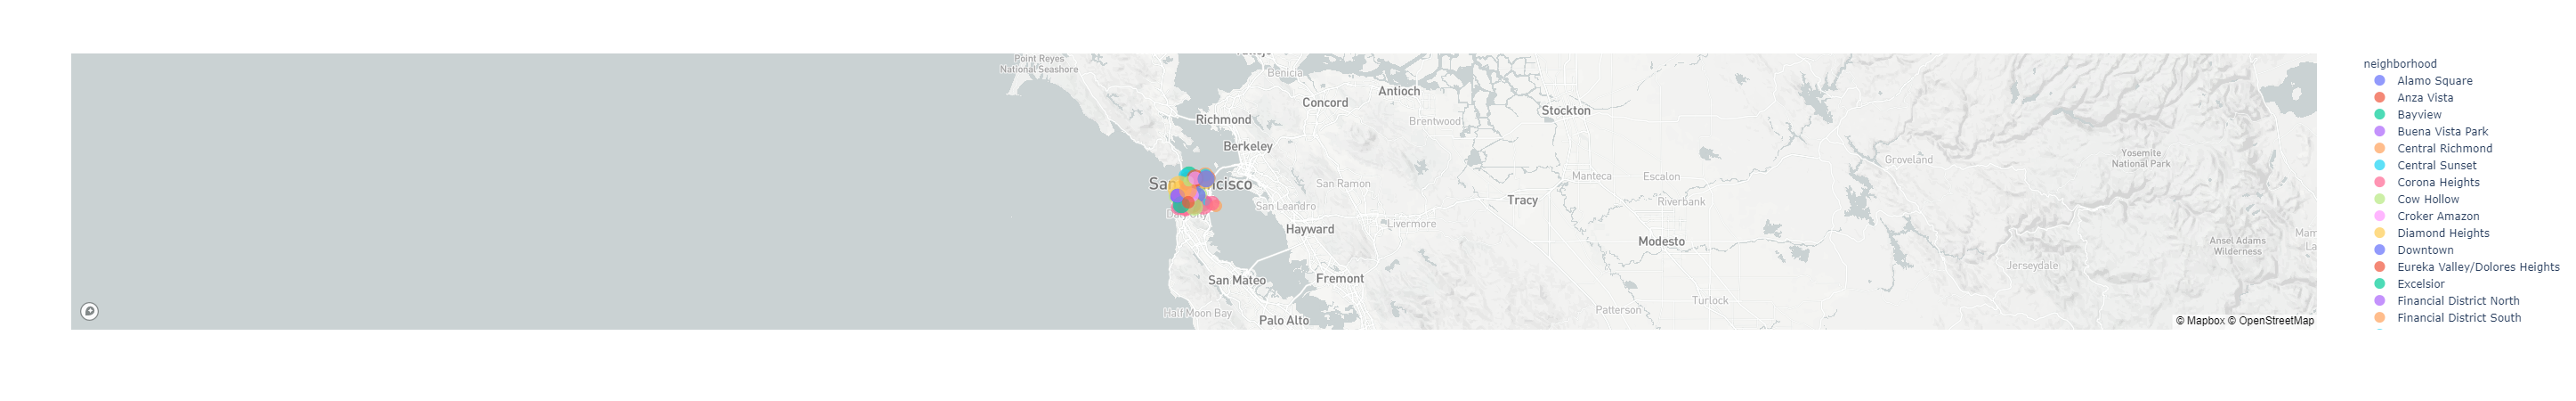

In [181]:
# Set the mapbox access token
px.set_mapbox_access_token(MAPBOX_API_KEY)

# Create a scatter mapbox to analyze neighborhood info
map_1 = px.scatter_mapbox(
sfo_data_hood_combine,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="neighborhood"
)
map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [129]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

NameError: name 'df_costs' is not defined

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


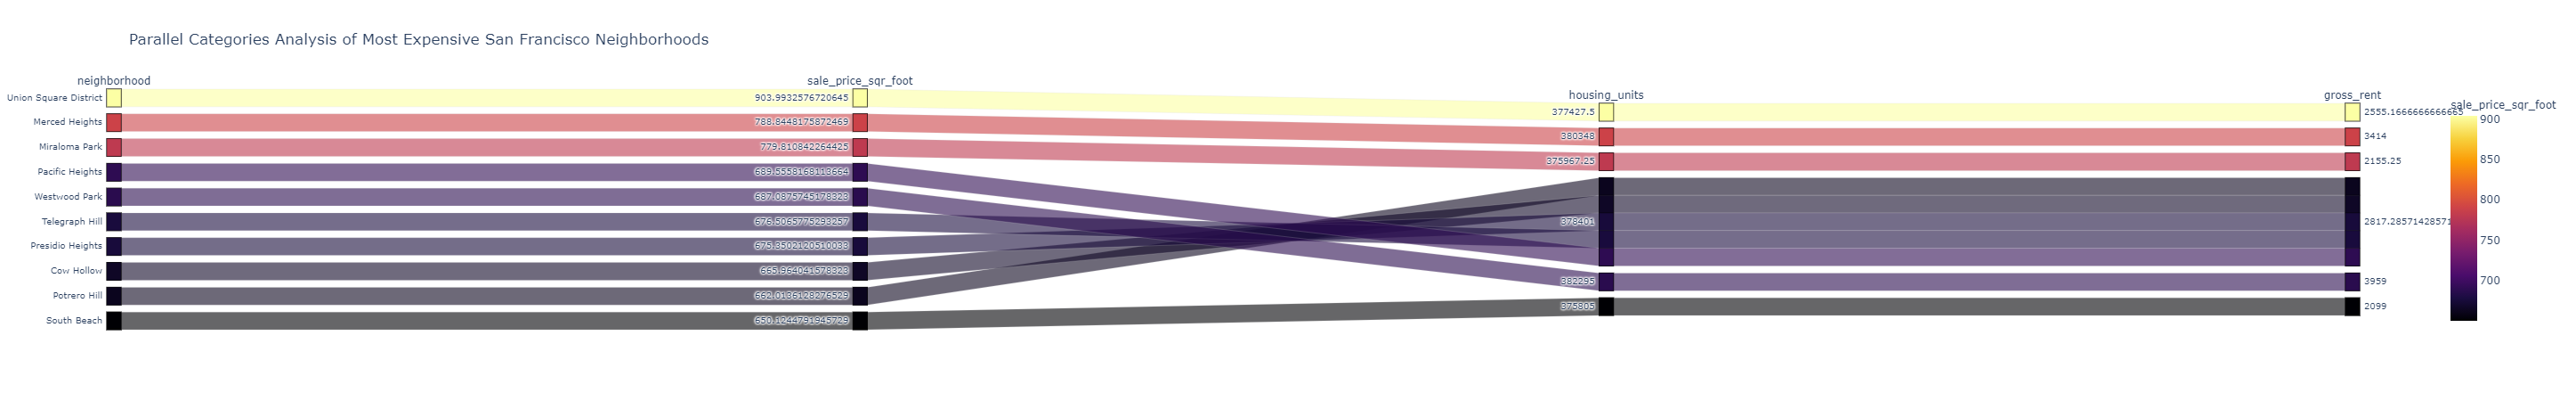

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

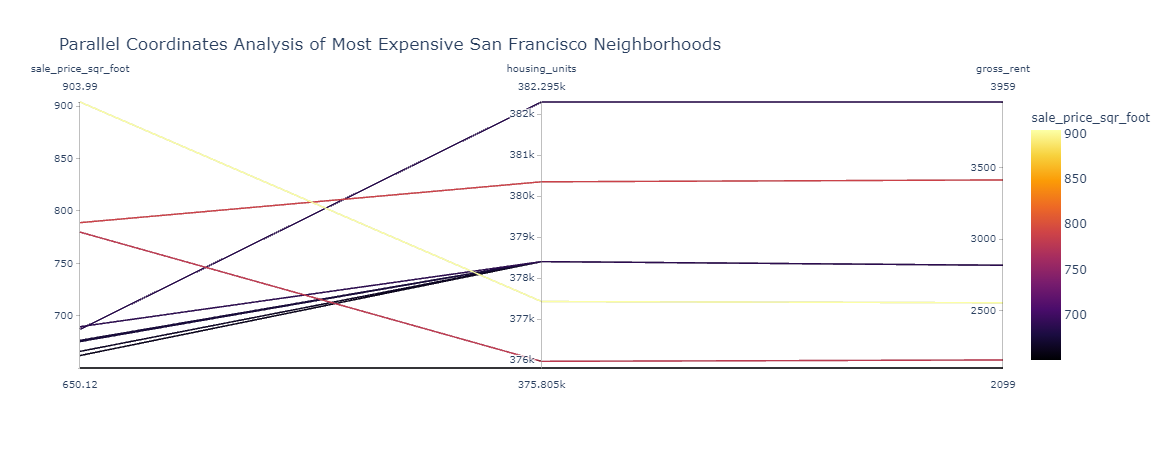

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

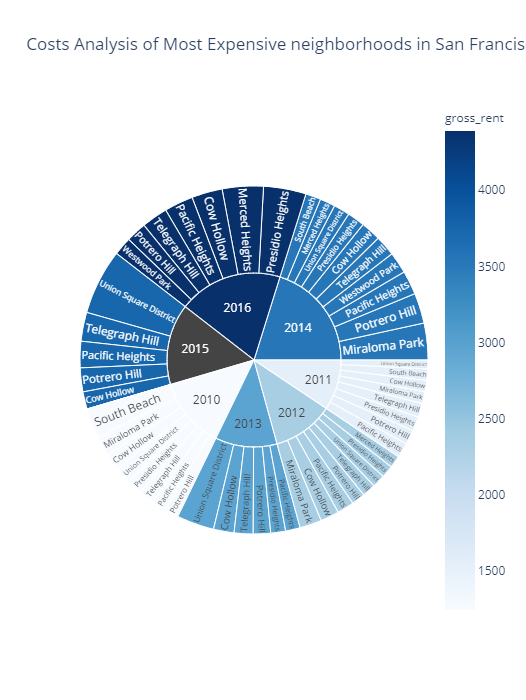

In [23]:
# Sunburst Plot
# YOUR CODE HERE!